# Airbnb Listings Data Analysis

## Overview
This notebook explores and analyzes Airbnb listing data to uncover insights about pricing, availability, location patterns, and host behavior.

## Dataset Description
The dataset contains information about Airbnb listings including:

| Column | Description |
|--------|-------------|
| id | Unique identifier for the listing |
| name | Title/name of the listing |
| host_id | Unique identifier for the host |
| neighbourhood_group | Broader area/borough |
| neighbourhood | Specific neighbourhood |
| latitude | Latitude coordinate |
| longitude | Longitude coordinate |
| room_type | Type of listing (Entire home, Private room, Shared room) |
| price | Nightly price in local currency |
| minimum_nights | Minimum nights required to book |
| number_of_reviews | Total number of reviews |
| last_review | Date of last review |
| reviews_per_month | Average reviews per month |
| calculated_host_listings_count | Number of listings the host has |
| availability_365 | Days available in next 365 days |

## Objectives
- Understand the distribution of listings across neighbourhoods
- Analyze pricing trends by location and room type
- Identify patterns in host behavior and availability
- Explore relationships between reviews, price, and availability

## Tools Used
- Python 3.x
- Pandas, NumPy
- Matplotlib, Seaborn

## AI Usage Disclosure
-AI tools were used for documentation and code assistance. Only column names and dataset structure were shared (as a best-practice approach, no data    values were shared with AI).



In [2]:
pwd

'C:\\Users\\mohit\\airbnb-nyc-pandas'

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\mohit\Downloads\airbnb-nyc-pandas\data\AB_NYC_2019.csv") 

In [5]:
df.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

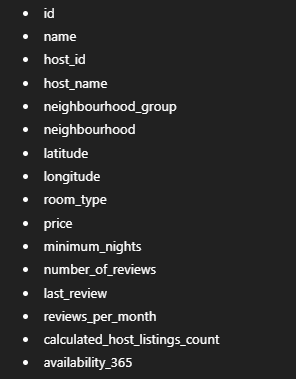

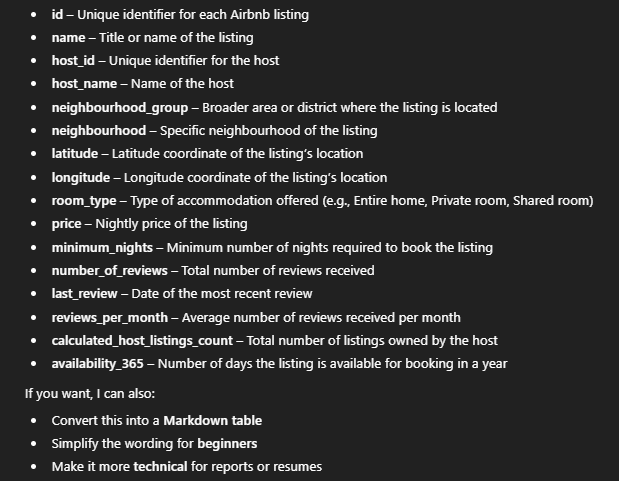

In [6]:
# so each listing is identified by an id,name
# host is the person offering the living space and his id also attached and name as well
# neighbourhood district and immediate neighbourhood are also given
# latitude,longitude are given for identifying on map the location
# whether entire home, private room or shared room i.e room type is provided
# per night price
# also a minimum no of nights might be required to make a booking, like some might have a minimum 2 nights
# total reviews received i.e number of reviews
# last review (i.e most recent review)
# avg reviews per month      (so 3 columns are for review related things)
# and info about no of listings of the host (one host might be provide many houses, flats etc)
# availibility_365 i.e like a listing might be available after some date due to some reason like someone already booked it for a period

In [7]:
# Quick overview of everything
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  str    
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  str    
 4   neighbourhood_group             48895 non-null  str    
 5   neighbourhood                   48895 non-null  str    
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  str    
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     38843 non-n

In [8]:
# int,str and float data types are involved

In [9]:
# First few rows to see actual values
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
# we can create 3 groups like: listing identifaction, host info and location info and keeping rest info as it is as they are important

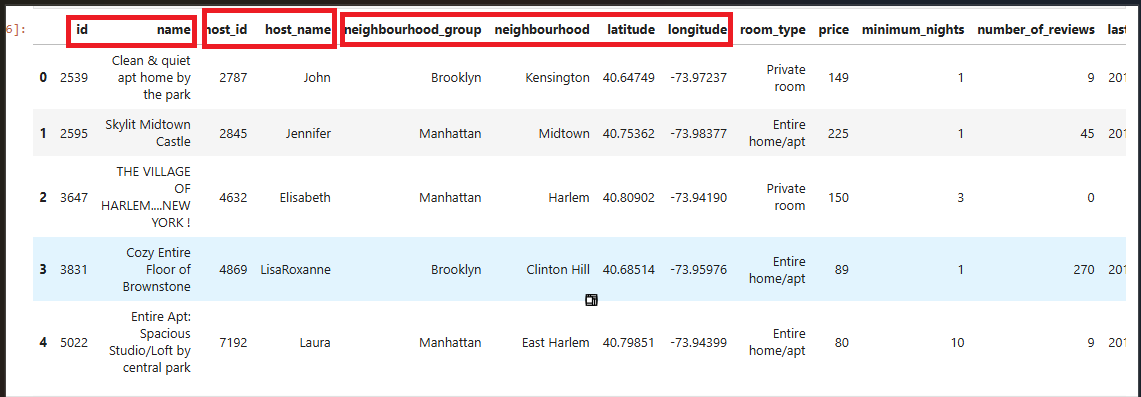

In [11]:
# last few columns are the main thing

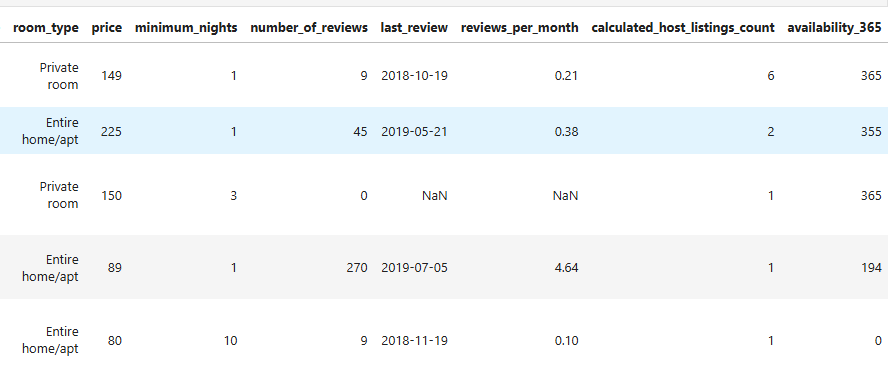

In [12]:
# also we can group the above columns as decision makers:


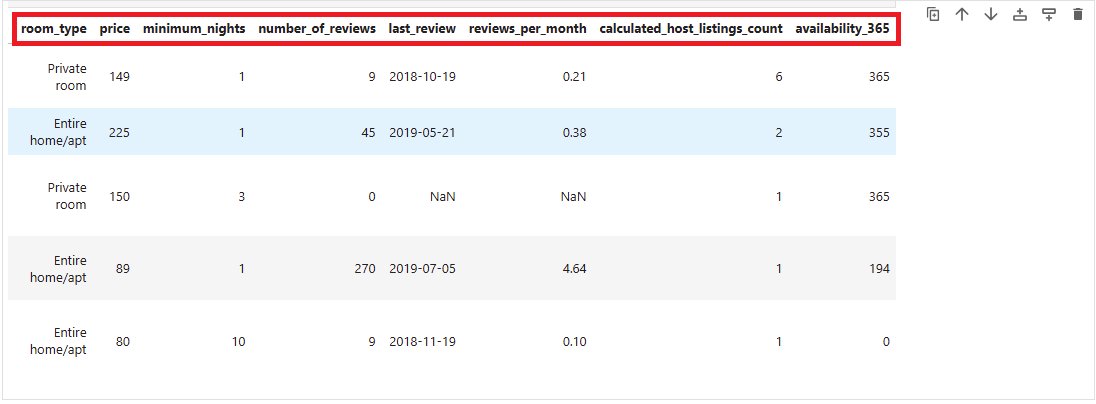

In [13]:
# so the overall the groups are:
# 1) listing info
# 2) host info
# 3) location info
# 4) decisision makers

In [14]:
# refined groups and column names

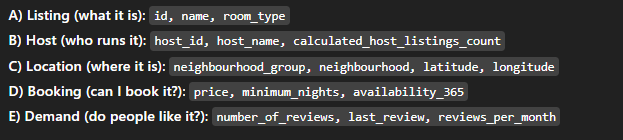

In [15]:
# Stats for numeric columns (price, latitude, longitude, etc.)
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [16]:
pwd

'C:\\Users\\mohit\\airbnb-nyc-pandas'

What each row means 

count = how many non-missing values exist in that column

mean = average

std = standard deviation (how spread out values are)

min = smallest value

25% = first quartile (25% of values are ≤ this)

50% = median (middle value)

75% = third quartile (75% of values are ≤ this)

max = largest value

In [17]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [18]:
# we will manually calculate mean of first 5 price ie: 149+225+15+89+80/5
# similarly

In [19]:
# all of these of these from data of first 5 rows:

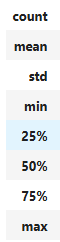

In [20]:
df.head(5).describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00,4.000000,5.000000,5.000000
mean,3526.800000,4465.000000,40.738756,-73.960358,138.600000,3.200000,66.60,1.332500,2.200000,255.800000
std,1023.060213,1807.464937,0.070592,0.018037,58.303516,3.898718,115.01,2.208006,2.167948,160.423502
min,2539.000000,2787.000000,40.647490,-73.983770,80.000000,1.000000,0.00,0.100000,1.000000,0.000000
25%,2595.000000,2845.000000,40.685140,-73.972370,89.000000,1.000000,9.00,0.182500,1.000000,194.000000
50%,3647.000000,4632.000000,40.753620,-73.959760,149.000000,1.000000,9.00,0.295000,1.000000,355.000000
75%,3831.000000,4869.000000,40.798510,-73.943990,150.000000,3.000000,45.00,1.445000,2.000000,365.000000
max,5022.000000,7192.000000,40.809020,-73.941900,225.000000,10.000000,270.00,4.640000,6.000000,365.000000


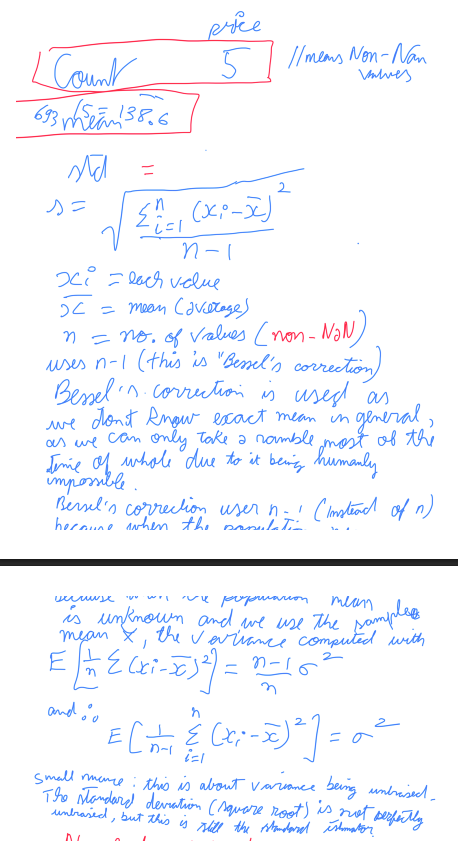

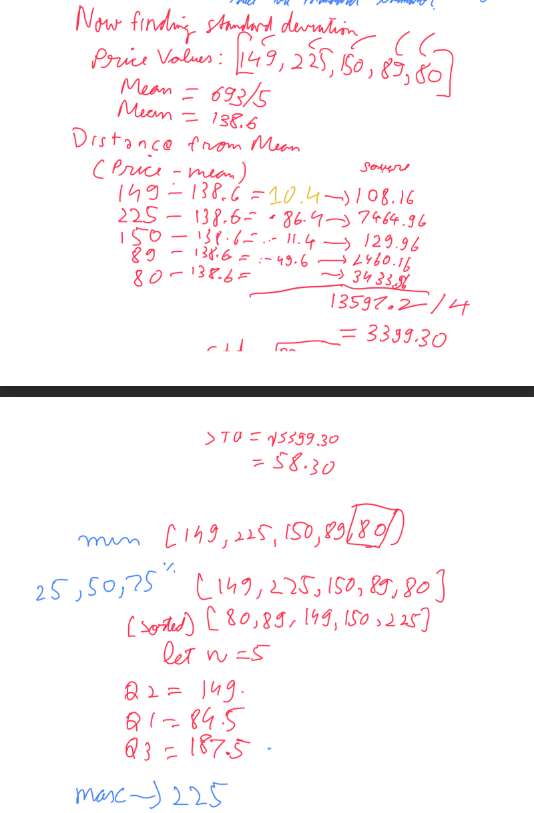

df.describe() explains the following:

NUMERIC COLUMNS (price, minimum_nights, etc.)


count
- Meaning: how many NON-missing numbers exist
- Intuition: “How many real data points do I actually have?”

mean
- Meaning: average = (sum of all values) / (count)
- Intuition: “If I spread all values evenly, what would each one become?”
- Note: outliers can pull it a lot.

std  (standard deviation)
- Meaning: typical distance from the mean
- Intuition: “How much do values wiggle around the average?”
- Small std = values are close together
- Big std   = values are scattered

min
- Meaning: smallest value
- Intuition: “The cheapest / smallest thing in the data.”

25%  (Q1 = 1st quartile)
- Meaning: 25% of values are <= this number
- Intuition: “A low-typical cutoff; 1 out of 4 values fall below here.”

50%  (Q2 = median)
- Meaning: middle value (half below, half above)
- Intuition: “The true middle price.”
- Note: not easily fooled by outliers

75%  (Q3 = 3rd quartile)
- Meaning: 75% of values are <= this number
- Intuition: “A high-typical cutoff; 3 out of 4 values fall below here.”

max
- Meaning: largest value
- Intuition: “The most expensive / biggest thing in the data.”

Extra intuition (super useful):
- “Middle 50% range” = [Q1, Q3]
- IQR (spread of the middle bulk) = Q3 - Q1



CATEGORICAL / TEXT COLUMNS (room_type, neighbourhood_group, host_name)


count
- Meaning: how many NON-missing entries exist
- Intuition: “How many rows have something filled in?”

unique
- Meaning: how many different categories/strings exist
- Intuition: “How many distinct types are there?”

top
- Meaning: most common value (mode)
- Intuition: “The category that shows up the most.”

freq
- Meaning: how many times “top” occurs
- Intuition: “How popular the most common category is.”

In [21]:
# now lets reload the whole df.describe()

In [22]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


For latitude + longitude, df.describe() is telling you the “geography distribution” of your listings.

Think:
- latitude  = up/down on the map (north/south)
- longitude = left/right on the map (east/west)
  (NYC longitudes are negative — that’s normal.)

Now what each describe() attribute means FOR lat/long:

count
- How many rows actually have a lat/long (non-missing coordinates).

mean
- The “average location” (a rough center point of all listings).
- Intuition: if you put a pin for every listing, the mean is like the center of mass of those pins.
- Good for: “where is the dataset centered?”
- Caution: if there are multiple clusters (Manhattan + Brooklyn), mean lands somewhere in-between.

std
- How spread out the listings are geographically (in degrees).
- Small std = listings tightly clustered in one area.
- Big std = listings spread across a wider area.
- Note: degrees aren’t miles directly; still gives a “tight vs wide” feel.

min
- The most extreme coordinate on one side:
  - lat min  = the most south listing
  - long min = the most west listing (more negative = farther west)

25% (Q1)
- “Low-side cutoff” of where listings lie:
  - 25% of listings have latitude <= Q1 (more southern quarter)
  - 25% of listings have longitude <= Q1 (more western quarter)

50% (median)
- The middle coordinate:
  - Half the listings are north/south of this latitude
  - Half are east/west of this longitude
- Often better than mean when there are outliers.

75% (Q3)
- “High-side cutoff”:
  - 75% of listings have latitude <= Q3 (so the top quarter are the most north)
  - 75% have longitude <= Q3 (top quarter are the most east / less negative)

max
- The other extreme:
  - lat max  = the most north listing
  - long max = the most east listing (least negative = farther east)

SUPER IMPORTANT BIG PICTURE:
- For lat/long, the quartiles (25/50/75) basically define the “central box” on the map
  where the middle 50% of listings lie.
- Range [min, max] tells your full geographic coverage.

If you paste your actual lat/long min/Q1/median/Q3/max values,
I can translate them into a simple sentence like:
“Most listings are between (lat A..B) and (long C..D), centered around (mean lat, mean long).”





For PRICE, df.describe() is telling you the “money distribution” of your listings.
It answers: what’s typical, how spread out prices are, and how extreme the cheapest/most expensive are.

Here’s what each describe() attribute means FOR price:

count
- How many listings have a price value (non-missing).
- If count < total rows, some prices are missing.

mean (average price)
- “Average price if you spread total cost evenly.”
- Good when prices are not super skewed.
- Caution: one or two crazy expensive listings can pull the mean upward.

std (standard deviation of price)
- “Typical wiggle distance from the mean price.”
- Small std = most listings are priced near the average.
- Big std = prices are all over the place (cheap + very expensive mixed).

min
- The cheapest listing price in the dataset.
- If min is 0 or extremely low, it may indicate bad data.

25% (Q1)
- 25% of listings have price <= Q1.
- Intuition: “low-typical price zone.”
- If your budget is around Q1, you’re in the cheaper quarter of listings.

50% (median)
- The middle price.
- Half of listings are cheaper than this, half are more expensive.
- Often the best single number for “typical price” (because it ignores crazy outliers).

75% (Q3)
- 75% of listings have price <= Q3.
- Intuition: “upper-typical price zone.”
- Above Q3 = you’re in the top 25% expensive listings.

max
- The most expensive listing price.
- Often an outlier (can be insanely high).

SUPER IMPORTANT BIG PICTURE (for price):
- The “normal middle bulk” of prices is between Q1 and Q3.
  That range is the middle 50% of listings.
- IQR = Q3 - Q1 tells how wide that “normal” band is.
- If mean >> median, prices are right-skewed (a few very expensive listings).
- If max is huge compared to Q3, you definitely have outliers.

One-liner you can write in notes:
- Median = typical price.
- Q1/Q3 = typical low and typical high.
- Mean/std = affected by outliers.
- Min/max = extremes (check for bad data or outliers).


For MINIMUM_NIGHTS, df.describe() is telling you the “stay policy distribution” across listings.
It answers: what’s the typical minimum stay requirement, and how strict the strict listings are.

Here’s what each describe() attribute means FOR minimum_nights:

count
- How many listings have a minimum_nights value (non-missing).

mean (average minimum nights)
- The average “required minimum stay” if you average all listings.
- Caution: can be pulled up by a few listings that require very long stays (30/90/365).

std
- How much minimum stay rules vary across listings.
- Small std = most listings have similar minimum nights.
- Big std = mix of very flexible (1–2 nights) and very strict (30+ nights) listings.

min
- The smallest minimum stay requirement.
- Usually 1 (means “you can book for 1 night”).

25% (Q1)
- 25% of listings require at most Q1 nights.
- Intuition: “the flexible quarter” of listings.

50% (median)
- The “typical” minimum nights requirement.
- Half the listings require <= this many nights.
- This is often the most useful number because minimum_nights is usually skewed.

75% (Q3)
- 75% of listings require at most Q3 nights.
- Above Q3 = stricter listings (top 25% most restrictive rules).

max
- The strictest listing’s minimum stay.
- Often reveals extreme policies (e.g., 365 nights = basically long-term only).

SUPER IMPORTANT BIG PICTURE (for minimum_nights):
- If mean > median, it usually means: “


For NUMBER_OF_REVIEWS, df.describe() is telling you the “popularity / activity distribution” of listings.
It answers: how reviewed listings typically are, how uneven popularity is, and what the most-reviewed listing looks like.

Here’s what each describe() attribute means FOR number_of_reviews:

count
- How many listings have a reviews count (usually all, unless missing).

mean (average reviews)
- Average number of reviews per listing.
- Caution: can be pulled up by a small number of super popular listings with tons of reviews.

std
- How uneven popularity is.
- Small std = most listings have similar review counts.
- Big std = some listings have very few reviews, some have a LOT.

min
- The smallest number of reviews.
- Often 0 → means a listing is new, inactive, or just hasn’t received reviews yet.

25% (Q1)
- 25% of listings have reviews <= Q1.
- Intuition: “the low-reviewed quarter” (many are new/less booked).

50% (median)
- The typical reviews count (middle listing).
- Very important because review counts are usually skewed.
- If median is small but mean is bigger → most listings have low reviews, few have huge reviews.

75% (Q3)
- 75% of listings have reviews <= Q3.
- Above Q3 = the top 25% most-reviewed / most popular listings.

max
- The largest review count.
- Shows the most-reviewed listing (often an outlier).

SUPER IMPORTANT BIG PICTURE (for number_of_reviews):
- Median tells “typical listing popularity.”
- Mean tells overall average but can be inflated by a few hits.
- If min = 0 and Q1 is small, lots of listings are new/low activity.
- A huge max vs Q3 means a few listings dominate reviews.

One-liner for notes:
- number_of_reviews is “popularity count”: usually skewed,
  so median + quartiles describe typical better than mean.


For REVIEWS_PER_MONTH, df.describe() is telling you the “review rate / booking activity rate”.
It answers: how fast listings are getting reviews recently (not total lifetime), and how uneven that activity is.

Here’s what each describe() attribute means FOR reviews_per_month:

count
- How many listings have a reviews_per_month value.
- IMPORTANT: this is often < total rows because many listings have no last_review / no review history,
  so their reviews_per_month becomes missing (NaN).

mean (average reviews per month)
- Average monthly review rate across listings that have this value.
- Interpretable as: “on average, how many reviews a listing gets per month”
- Caution: can be pulled up by very active listings.

std
- How much review activity rate varies.
- Small std = most listings have similar activity.
- Big std = some listings are quiet, some get reviews very frequently.

min
- Smallest monthly review rate.
- Often close to 0 (almost no monthly activity).

25% (Q1)
- 25% of listings have reviews_per_month <= Q1.
- Intuition: “low activity rate cutoff.”

50% (median)
- Typical monthly review rate.
- Usually the best “typical activity” number because rates can be skewed.

75% (Q3)
- 75% of listings have reviews_per_month <= Q3.
- Above Q3 = highly active listings (top 25% by review rate).

max
- Largest monthly review rate.
- Often extreme (could be a listing that gets reviews constantly).

SUPER IMPORTANT BIG PICTURE (for reviews_per_month):
- This is a RATE (speed), not a total count.
  number_of_reviews = “how many reviews overall”
  reviews_per_month = “how fast reviews are happening recently”
- count being smaller here reveals missingness:
  many listings don’t have enough review history to compute this.
- Mean/median describe “typical activity among listings with review history.”

One-liner for notes:
- reviews_per_month = “activity speed”; lots of NaNs; interpret stats only on non-missing listings.


For CALCULATED_HOST_LISTINGS_COUNT, df.describe() is telling you the “host portfolio size distribution”.
It answers: how many listings hosts typically have, and whether your dataset has many multi-listing hosts.

Meaning of the column (simple):
- For each listing row, this value says: “how many total listings does this host have (in this dataset).”

Now what each describe() attribute means FOR calculated_host_listings_count:

count
- How many listings have this value (usually all).

mean (average host listing count)
- Average number of listings per host (as represented across listing rows).
- Intuition: “typical host portfolio size.”
- Caution: this can be pulled up by a few big hosts with tons of listings.

std
- How unequal host sizes are.
- Small std = most hosts have similar (usually small) number of listings.
- Big std = mix of many single-listing hosts + a few very large hosts.

min
- Smallest host listing count.
- Usually 1 → hosts who have only one listing.

25% (Q1)
- 25% of listings are from hosts who have <= Q1 listings.
- Often Q1 = 1 (meaning at least 25% are single-listing hosts).

50% (median)
- Typical host listing count.
- If median = 1, it means “most listings are from hosts with just one listing.”

75% (Q3)
- 75% of listings are from hosts who have <= Q3 listings.
- Above Q3 = multi-listing “power hosts” (top 25% by portfolio size).

max
- Largest host listing count in the dataset.
- Shows the biggest host portfolio (often an outlier / property manager).

SUPER IMPORTANT BIG PICTURE:
- If median is 1 but mean is larger, it means:
  “most hosts have one listing, but a few hosts have many listings and pull the average up.”
- This column helps detect whether the marketplace is mostly individual hosts
  or dominated by multi-listing operators.

One-liner for notes:
- calculated_host_listings_count = “host portfolio size”; usually skewed; median tells typical host.


For AVAILABILITY_365, df.describe() is telling you the “how many days per year this listing is available to book”
(0 to 365).

Meaning of the column (simple):
- availability_365 = number of days in the next 365 days that the listing is available (not blocked/booked).

Now what each describe() attribute means FOR availability_365:

count
- How many listings have an availability_365 value (usually all).

mean (average availability days)
- Average days available per year across listings.
- Intuition: “typical listing is available about ___ days/year.”

std
- How mixed the availability is.
- Small std = most listings have similar availability.
- Big std = some listings almost never available, others always available.

min
- Smallest availability.
- Often 0 → means no days available (fully booked, blocked, or not accepting bookings).

25% (Q1)
- 25% of listings have availability <= Q1.
- Intuition: “low-availability cutoff” (many are mostly unavailable).

50% (median)
- Typical availability.
- Half listings have availability <= median.

75% (Q3)
- 75% of listings have availability <= Q3.
- Above Q3 = “high availability” listings (very open calendar).

max
- Largest availability.
- Often 365 → listing is available every day (always open).

SUPER IMPORTANT BIG PICTURE:
- This is a bounded number (0..365).
- If you see lots of 0s or a small median, it suggests many listings are rarely available.
- If you see lots of 365s or a large median, many listings are generally open year-round.

One-liner for notes:
- availability_365 = “open days in next year”; min=0 fully blocked, max=365 always open; median shows typical.


In [28]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [31]:
# Categorical stats
df.describe(include='object')

C:\Users\mohit\AppData\Local\Temp\ipykernel_7536\2529727394.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include='object')


,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [32]:
# Missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [33]:
# Unique values
df['neighbourhood_group'].unique()
df['room_type'].unique()
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64